In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-customer-churn-prediction/Churn_Modelling.csv


In [26]:
# EDA (pandas-profiling, etc. )
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import ydata_profiling as pp
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt


In [8]:
df=pd.read_csv('/kaggle/input/bank-customer-churn-prediction/Churn_Modelling.csv')
df

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0          2       0.00              1          1               1   
1          1   83807.86              1          0               1   
2          8  159660.80              3          1               0   
3          1       0.00              2          0               0   
4          2  125510.82              1          1               1   
...      ...        ...            ...        ...             ...   
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  
0           101348.88       1  
1           112542.58       0  
2           113931.57       1  
3            93826.63       0  
4            79084.10       0  
...               ...     ...  
9995         96270.64       0  
9996        101699.77       0  
9997         42085.58       1  
9998         92888.52       1  
9999         38190.78       0  

[10000 rows x 14 columns]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
pp.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
# Count the number of unique values in each column
unique_counts = df.nunique()
unique_counts

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [10]:
# List of columns to drop
columns_to_drop = ['RowNumber', 'CustomerId', 'Surname']  # Replace with the actual column names you want to drop

# Drop the columns
data = df.drop(columns=columns_to_drop)

In [11]:
data

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619    France  Female   42       2       0.00              1   
1             608     Spain  Female   41       1   83807.86              1   
2             502    France  Female   42       8  159660.80              3   
3             699    France  Female   39       1       0.00              2   
4             850     Spain  Female   43       2  125510.82              1   
...           ...       ...     ...  ...     ...        ...            ...   
9995          771    France    Male   39       5       0.00              2   
9996          516    France    Male   35      10   57369.61              1   
9997          709    France  Female   36       7       0.00              1   
9998          772   Germany    Male   42       3   75075.31              2   
9999          792    France  Female   28       4  130142.79              1   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0             1               1        101348.88       1  
1             0               1        112542.58       0  
2             1               0        113931.57       1  
3             0               0         93826.63       0  
4             1               1         79084.10       0  
...         ...             ...              ...     ...  
9995          1               0         96270.64       0  
9996          1               1        101699.77       0  
9997          0               1         42085.58       1  
9998          1               0         92888.52       1  
9999          1               0         38190.78       0  

[10000 rows x 11 columns]

In [9]:
data.shape[1]

11

In [12]:
# List of categorical columns to encode
categorical_columns = ['Geography', 'Gender']  # Replace with your categorical column names

In [13]:
# Perform one-hot encoding
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

In [12]:
data_encoded.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

In [14]:
data_encoded

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0             619   42       2       0.00              1          1   
1             608   41       1   83807.86              1          0   
2             502   42       8  159660.80              3          1   
3             699   39       1       0.00              2          0   
4             850   43       2  125510.82              1          1   
...           ...  ...     ...        ...            ...        ...   
9995          771   39       5       0.00              2          1   
9996          516   35      10   57369.61              1          1   
9997          709   36       7       0.00              1          0   
9998          772   42       3   75075.31              2          1   
9999          792   28       4  130142.79              1          1   

      IsActiveMember  EstimatedSalary  Exited  Geography_Germany  \
0                  1        101348.88       1              False   
1                  1        112542.58       0              False   
2                  0        113931.57       1              False   
3                  0         93826.63       0              False   
4                  1         79084.10       0              False   
...              ...              ...     ...                ...   
9995               0         96270.64       0              False   
9996               1        101699.77       0              False   
9997               1         42085.58       1              False   
9998               0         92888.52       1               True   
9999               0         38190.78       0              False   

      Geography_Spain  Gender_Male  
0               False        False  
1                True        False  
2               False        False  
3               False        False  
4                True        False  
...               ...          ...  
9995            False         True  
9996            False         True  
9997            False        False  
9998            False         True  
9999            False        False  

[10000 rows x 12 columns]

In [15]:
# Separate the features and the target variable
X = data_encoded.drop(columns=['Exited'])  # Features
y = data_encoded['Exited']  # Target

In [16]:
# Initialize the StandardScaler
scaler = StandardScaler()

In [17]:
# Fit the scaler to the features and transform them
X_scaled = scaler.fit_transform(X)

In [18]:
# Convert the scaled features back to a DataFrame for better readability
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

In [19]:
# If you want to include the target variable in the scaled DataFrame
X_scaled_df['Exited'] = y.values

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

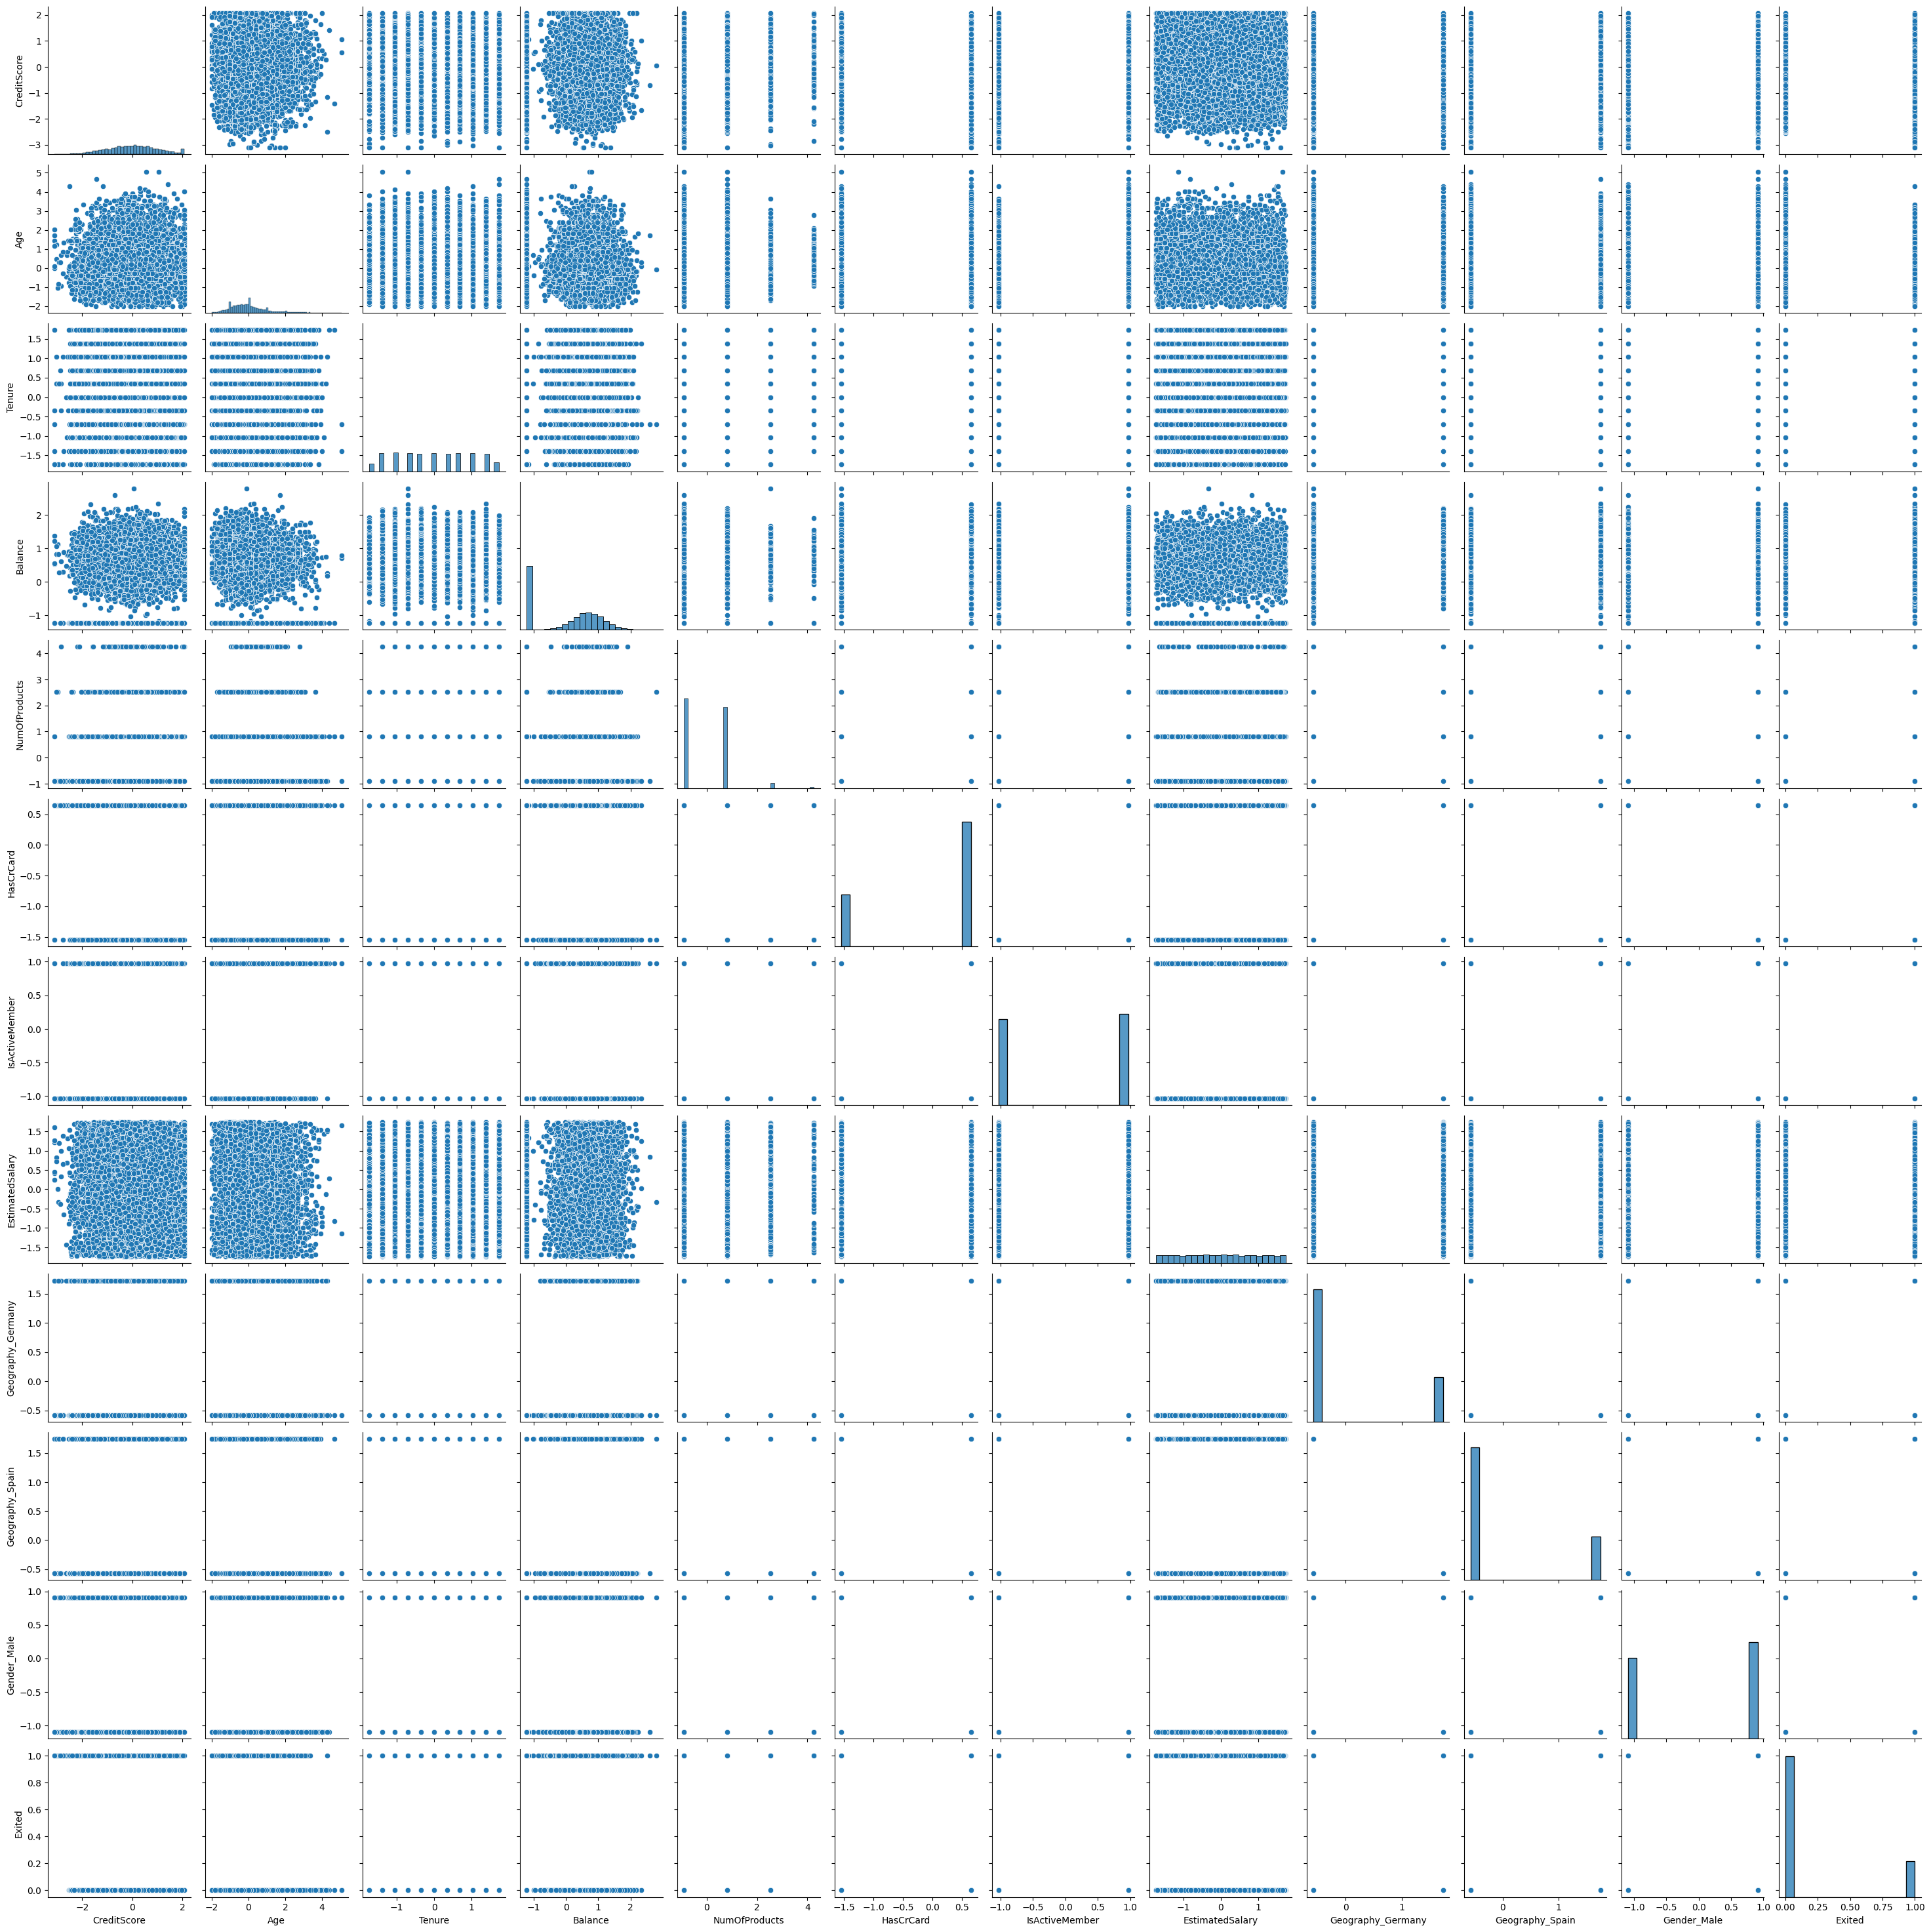

In [23]:
# Assuming X_scaled_df is your DataFrame after scaling
sns.pairplot(X_scaled_df)
plt.show()

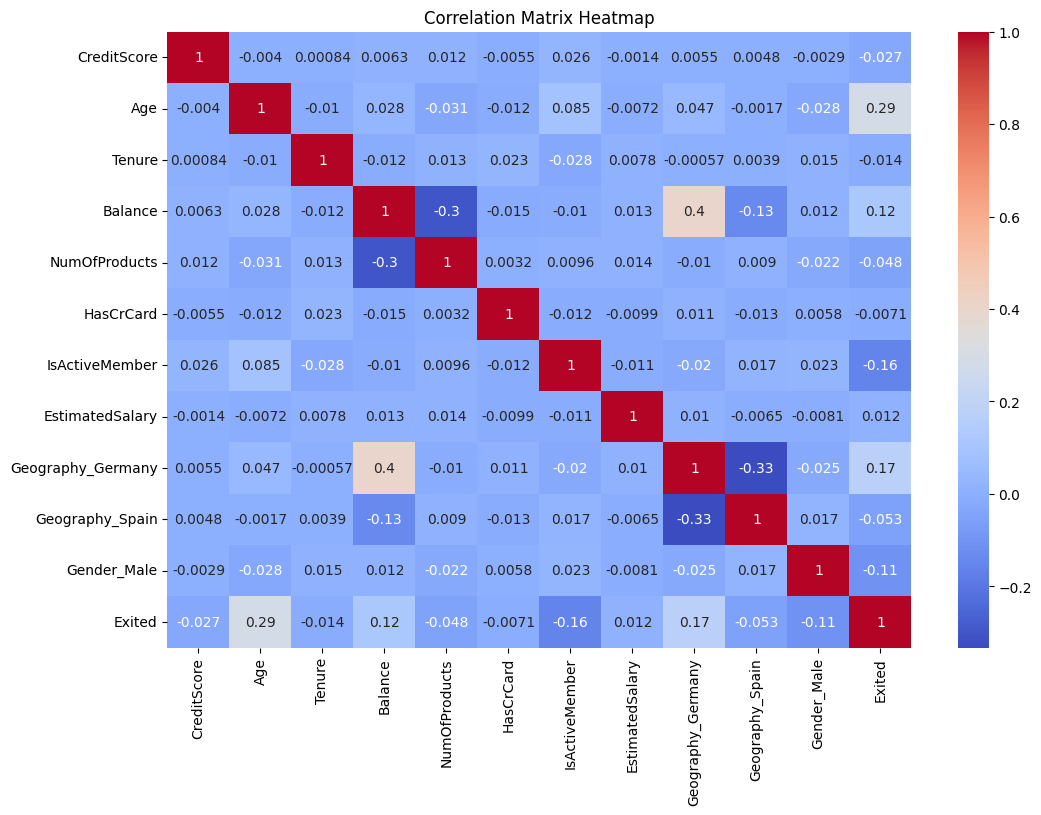

In [24]:
#correlation matrix 
plt.figure(figsize=(12, 8))
sns.heatmap(X_scaled_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [20]:
# Assuming the target variable is 'Exited'
X = X_scaled_df.drop(columns=['Exited'])
y = X_scaled_df['Exited']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Initialize the Logistic Regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

LogisticRegression()

In [17]:
# Predict the target variable on the test data
y_pred = model.predict(X_test)

In [18]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.81
Confusion Matrix:
[[1543   64]
 [ 314   79]]


In [20]:
# Define the hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2', 'elasticnet'],  # Norm used in penalization
    'solver': ['liblinear', 'saga'],  # Solver algorithm
    'max_iter': [100, 200, 300]  # Maximum number of iterations
}

In [21]:
# Initialize the Logistic Regression model
log_reg = LogisticRegression()

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [22]:
# Fit the model
grid_search.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
150 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 64, in _check_solver
    raise ValueError(
ValueError: Onl

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [23]:
# Best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'C': 10, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}


In [24]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.81
Confusion Matrix:
[[1543   64]
 [ 314   79]]


trying another model "RANDOM FOREST"

In [21]:
rf = RandomForestClassifier()

In [22]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [24]:
y_pred_rf = rf.predict(X_test)

In [25]:
# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")

# Confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:")
print(conf_matrix_rf)

Random Forest Accuracy: 0.87
Confusion Matrix:
[[1546   61]
 [ 200  193]]


In [27]:
gb = GradientBoostingClassifier()

In [28]:
gb.fit(X_train, y_train)

GradientBoostingClassifier()

In [29]:
y_pred_gb = gb.predict(X_test)

In [30]:
# Calculate accuracy
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"Gradient Boosting Accuracy: {accuracy_gb:.2f}")

# Confusion matrix
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
print("Confusion Matrix:")
print(conf_matrix_gb)

Gradient Boosting Accuracy: 0.87
Confusion Matrix:
[[1543   64]
 [ 201  192]]


In [31]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 1.0]
}

In [32]:
gb = GradientBoostingClassifier()

In [33]:
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 486 candidates, totalling 1458 fits
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   1.3s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200, subsample=0.8; total time=   2.3s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200, subsample=1.0; total time=   2.5s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=300, subsample=1.0; total time=   3.7s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   1.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=100, subsample=1.0; total time=   1.3s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=200, subsample=0.8; total time

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 1.0]},
             verbose=2)


[CV] END learning_rate=0.2, max_depth=4, min_samples_leaf=2, min_samples_split=10, n_estimators=300, subsample=0.8; total time=   4.6s
[CV] END learning_rate=0.2, max_depth=4, min_samples_leaf=4, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   1.4s
[CV] END learning_rate=0.2, max_depth=4, min_samples_leaf=4, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   1.4s
[CV] END learning_rate=0.2, max_depth=4, min_samples_leaf=4, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   1.6s
[CV] END learning_rate=0.2, max_depth=4, min_samples_leaf=4, min_samples_split=2, n_estimators=200, subsample=0.8; total time=   2.9s
[CV] END learning_rate=0.2, max_depth=4, min_samples_leaf=4, min_samples_split=2, n_estimators=200, subsample=1.0; total time=   3.2s
[CV] END learning_rate=0.2, max_depth=4, min_samples_leaf=4, min_samples_split=2, n_estimators=300, subsample=1.0; total time=   4.7s
[CV] END learning_rate=0.2, max_depth=4, min_samples_leaf=4,

In [34]:
print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 0.8}


In [35]:
best_gb = grid_search.best_estimator_
y_pred_best_gb = best_gb.predict(X_test)

In [36]:
accuracy_best_gb = accuracy_score(y_test, y_pred_best_gb)
print(f"Tuned Gradient Boosting Accuracy: {accuracy_best_gb:.2f}")

# Confusion matrix
conf_matrix_best_gb = confusion_matrix(y_test, y_pred_best_gb)
print("Confusion Matrix:")
print(conf_matrix_best_gb)

Tuned Gradient Boosting Accuracy: 0.87
Confusion Matrix:
[[1538   69]
 [ 200  193]]
